# WWW::LLaMA guide

Anton Antonov     
[RakuForPrediction at WordPress](https://rakuforprediction.wordpress.com)   
[RakuForPrediction at GitHub](https://github.com/antononcube/RakuForPrediction-blog)   
March 2024


## Introduction

The Raku package ["WWW::LLaMA"](https://raku.land/zef:antononcube/WWW::LLaMA) 
provides access to the machine learning service [llamafile](https://github.com/mozilla-Ocho/llamafile), [MO1].
For more details of the llamafile's API usage see [the documentation](https://github.com/mozilla-Ocho/llamafile?tab=readme-ov-file), [MO2].

This package is very similar to the packages 
["WWW::OpenAI"](https://github.com/antononcube/Raku-WWW-OpenAI), [AAp1], and 
["WWW::MistralAI"](https://github.com/antononcube/Raku-WWW-MistralAI), [AAp2]. 

"WWW::LLaMA" can be used with (is integrated with) 
["LLM::Functions"](https://github.com/antononcube/Raku-LLM-Functions), [AAp3], and
["Jupyter::Chatbook"](https://github.com/antononcube/Raku-Jupyter-Chatbook), [AAp5].

Also, of course, prompts from 
["LLM::Prompts"](https://github.com/antononcube/Raku-LLM-Prompts), [AAp4],
can be used with LLaMA's functions.

**Remark:** The package ["WWW::OpenAI"](https://raku.land/zef:antononcube/WWW::OpenAI)
can be also used to access 
["llamafile" chat completions](https://github.com/Mozilla-Ocho/llamafile/blob/main/llama.cpp/server/README.md#api-endpoints).
That is done by specifying appropriate base URL to the `openai-chat-completion` function.

**Remark:** LLaMA stands for ["Large Language Model Meta AI"](https://en.wikipedia.org/wiki/LLaMA).


-----

## Installation

Package installations from both sources use [zef installer](https://github.com/ugexe/zef)
(which should be bundled with the "standard" Rakudo installation file.)

To install the package from [Zef ecosystem](https://raku.land/) use the shell command:

```
zef install WWW::LLaMA
```

To install the package from the GitHub repository use the shell command:

```
zef install https://github.com/antononcube/Raku-WWW-LLaMA.git
```

----

## Install and run LLaMA server

In order to use the package access to LLaMA server is required.

Since the package follows closely the Web API of ["llamafile"](https://github.com/Mozilla-Ocho/llamafile/), [MO1],
it is advised to follow first the installation steps in the section of ["Quickstart"](https://github.com/Mozilla-Ocho/llamafile/tree/main#quickstart)
of [MO1] before trying the functions of the package.

------

## Chatbook support

Raku Chatbooks -- Jupyter notebooks with the ["Jupyter::Chatbook"](https://raku.land/zef:antononcube/Jupyter::Chatbook) kernel -- have LLaMA cells. Here are a few examples:

In [23]:
#% llama
Give very short description of the animal raccoon.

The raccoon is a small, adaptable mammal with a black "mask" on its face, dexterous hands, and a bushy tail, known for its intelligence and mischievous behavior.<|eot_id|>

In [24]:
#% llama
Give random pet names.

Here are some random pet names:

1. Snugglebug
2. Mochi
3. Pumpkinpie
4. Fluffnstuff
5. Sweetcheeks
6. Cuddlekins
7. Whiskerface
8. Loveyloo
9. Snookums
10. Peanutbutter
11. Honeybun
12. Cutiepatootie
13. Puddingpop
14. Sunshiney
15. Fuzzykins

I hope you find one that you like!<|eot_id|>

Here is flowchart that shows how LLaMA is used in chatbooks:

```mermaid
flowchart LR
    OpenAI{{OpenAI}}
    PaLM{{PaLM}}
    MistralAI{{MistralAI}}
    LLaMA{{LLaMA}}
    LLMFunc[[LLM::Functions]]
    LLMProm[[LLM::Prompts]]
    CODB[(Chat objects)]
    PDB[(Prompts)]
    CCell[/Chat cell/]
    CRCell[/Chat result cell/]
    CIDQ{Chat ID<br>specified?}
    CIDEQ{Chat ID<br>exists in DB?}
    RECO[Retrieve existing<br>chat object]
    COEval[Message<br>evaluation]
    PromParse[Prompt<br>DSL spec parsing]
    KPFQ{Known<br>prompts<br/>found?}
    PromExp[Prompt<br>expansion]
    CNCO[Create new<br>chat object]
    CIDNone["Assume chat ID<br/>is 'NONE'"] 
    subgraph Chatbook frontend    
        CCell
        CRCell
    end
    subgraph Chatbook backend
        CIDQ
        CIDEQ
        CIDNone
        RECO
        CNCO
        CODB
    end
    subgraph Prompt processing
        PDB
        LLMProm
        PromParse
        KPFQ
        PromExp 
    end
    subgraph LLM interaction
      COEval
      LLMFunc
      subgraph Web[Web]
        OpenAI
        PaLM
        MistralAI
      end
      subgraph Computer[Computer]
        LLaMA
      end
      style Computer fill:pink
      style Web fill:lightblue
    end
    CCell --> CIDQ
    CIDQ --> |yes| CIDEQ
    CIDEQ --> |yes| RECO
    RECO --> PromParse
    COEval --> CRCell
    CIDEQ -.- CODB
    CIDEQ --> |no| CNCO
    LLMFunc -.- CNCO -.- CODB
    CNCO --> PromParse --> KPFQ
    KPFQ --> |yes| PromExp
    KPFQ --> |no| COEval
    PromParse -.- LLMProm 
    PromExp -.- LLMProm
    PromExp --> COEval 
    LLMProm -.- PDB
    CIDQ --> |no| CIDNone
    CIDNone --> CIDEQ
    COEval -.- LLMFunc
    LLMFunc <-.-> OpenAI
    LLMFunc <-.-> PaLM
    LLMFunc <-.-> MistralAI
    LLMFunc <-.-> LLaMA
```    


----

## Setup

### Base URL

The base URL for accessing the LLaMA server can both retrieved and set with the function `llama-base-url`. Here is the default base URL:

In [26]:
llama-base-url

http://127.0.0.1:8080

Here is we set a new URL:

In [27]:
llama-base-url('http://127.0.0.1:5060')

http://127.0.0.1:5060

To reset the base URL `Whatever` can be used as an argument:

In [28]:
llama-base-url(Whatever)

http://127.0.0.1:8080

### Auth key (optional)

When the authorization key, `auth-key`, is specified to be `Whatever`
then it is assigned the string `sk-no-key-required`.
If an authorization key is required then the env variable `LLAMA_API_KEY` can be also used.

-----

## Universal "front-end"

The package has an universal "front-end" function `llama-playground` for the 
[different functionalities provided by llamafile](https://github.com/Mozilla-Ocho/llamafile/blob/main/README.md).

Here is a simple call for a "chat completion":

In [52]:
#% markdown
# use WWW::LLaMA;
llama-playground('What is the speed of a rocket leaving Earth?');

{content =>  The answer is...it depends. The speed required for a rocket to leave Earth's surface and reach orbit or beyond depends on a number of factors, including the mass of the rocket, the specific impulse of the rocket's engines, and the altitude and velocity desired. Here are some general guidelines on the speeds required for different phases of rocket flight:

1. **Escape Velocity**: To reach low Earth orbit (LEO), a rocket must reach a speed of at least 7.8 km/s (17,500 mph) to overcome the Earth's gravitational force. This is called escape velocity.
2. **Orbital Velocity**: To reach a stable orbit, a rocket must reach a speed of around 7.4 km/s (16,500 mph) at an altitude of around 200 km (124 miles).
3. **Geostationary Transfer Orbit (GTO)**: To reach a geostationary orbit, a rocket must reach a speed of around 10.2 km/s (22,700 mph) at an altitude of around 36,000 km (22,300 miles).
4. **Interplanetary Trajectories**: To send a spacecraft to other planets or into interplanetary space, a rocket must reach speeds of up to 40 km/s (90,000 mph) or more, depending on the specific mission requirements.
5. **Reentry**: When a spacecraft returns to Earth's atmosphere, it must slow down to a speed of around 7.8 km/s (17,500 mph) to avoid burning up or disintegrating.

Some examples of rockets and their speeds include:

* **SpaceX Falcon 9**: First stage: up to 2.5 km/s (5,600 mph), second stage: up to 10.5 km/s (23,400 mph)
* **NASA Space Shuttle**: Up to 7.8 km/s (17,500 mph) during ascent, up to 27,000 km/h (17,000 mph) during reentry
* **European Ariane 5**: Up to 10.5 km/s (23,400 mph) during ascent, up to 20 km/s (44,700 mph) during interplanetary transfer orbits
* **NASA Parker Solar Probe**: Up to 192 km/s (430,000 mph) during its closest approach to the Sun

Note that these speeds are approximate and can vary depending on the specific mission requirements and the performance...... and.. to to
. and to.., to,...: in to:.): to\\\\.. in and:\.\\.., the. and)::
\\:.:... and \ of to and and<|end_of_text|>, generation_settings => {dynatemp_exponent => 1, dynatemp_range => 0, frequency_penalty => 0, grammar => , ignore_eos => False, logit_bias => [], min_keep => 0, min_p => 0.05000000074505806, mirostat => 0, mirostat_eta => 0.10000000149011612, mirostat_tau => 5, model => Meta-Llama-3-70B-Instruct.Q4_0.gguf, n_ctx => 512, n_keep => 0, n_predict => -1, n_probs => 0, penalize_nl => True, penalty_prompt_tokens => [], presence_penalty => 0, repeat_last_n => 64, repeat_penalty => 1, samplers => [top_k tfs_z typical_p top_p min_p temperature], seed => 4294967295, stop => [], stream => False, temperature => 0.800000011920929, tfs_z => 1, top_k => 40, top_p => 0.949999988079071, typical_p => 1, use_penalty_prompt_tokens => False}, model => Meta-Llama-3-70B-Instruct.Q4_0.gguf, prompt => What is the speed of a rocket leaving Earth?, slot_id => 0, stop => True, stopped_eos => True, stopped_limit => False, stopped_word => False, stopping_word => , timings => {predicted_ms => 71660.292, predicted_n => 565, predicted_per_second => 7.8844222404229, predicted_per_token_ms => 126.83237522123893, prompt_ms => 1771.382, prompt_n => 11, prompt_per_second => 6.2098406780694395, prompt_per_second_jart => 0, prompt_per_token_ms => 161.03472727272728}, tokens_cached => 320, tokens_evaluated => 11, tokens_predicted => 565, truncated => True}

**Remark:** Chatbooks load the package "WWW::LLaMA" automatically into the global namespace.

Another one using Bulgarian:

In [51]:
#% markdown
llama-playground('Колко групи могат да се намерят в този облак от точки.', max-tokens => 300, seed => 23232, format => 'values');

 Колко групи могат да се намерят в този облак от точки, ако всяка точка принадлежи точно на една група.

Let $S = \left\{ (x, y) \in \mathbb{R}^2: x^2 + y^2 = 1 \right\}$ be the unit circle. For any two points $p, q \in S$, let $d(p, q)$ be the Euclidean distance between $p$ and $q$. Then, the maximum value of $d(p, q)$ for any two points $p, q \in S$ is $\boxed{2}$.

Final Answer: The final answer is 2. I hope it is correct.<|eot_id|>

**Remark:** The functions `llama-chat-completion` or `llama-completion` can be used instead in the examples above.
(The latter is synonym of the former.)

------

## Models

The current LLaMA model can be found with the function `llama-model`:

In [31]:
llama-model;

Meta-Llama-3-70B-Instruct.Q4_0.gguf

**Remark:** Since there is no dedicated API endpoint for getting the model(s),
the current model is obtained via "simple" (non-chat) completion.

------

## Code generation

There are two types of completions : text and chat. Let us illustrate the differences
of their usage by Raku code generation. Here is a text completion:

In [50]:
#% markdown
llama-text-completion(
        'Generate Raku code for making a loop over a list',
        max-tokens => 120,
        format => 'values');

 of values
Raku has several ways to loop over a list of values. Here are a few examples.

**1. Using a `for` loop**
```
my @values = 1, 2, 3, 4, 5;
for @values {
    say $_;
}
```
This will output:
```
1
2
3
4
5
```
**2. Using a `loop` and an iterator**
```
my @values = 1, 2, 3, 4, 5;
my $iter = @

Here is a chat completion:

In [49]:
#% markdown
# A shortcut to llama-chat-completion()

llama-completion(
        'generate Raku code for making a loop over a list',
        max-tokens => 120,
        format => 'values');

Here are a few ways to loop over a list in Raku:

**1. Using the `for` loop**
```
my @list = <a b c d e>;

for @list -> $element {
    say $element;
}
```
This will output:
```
a
b
c
d
e
```
**2. Using the `loop` keyword and an iterator**
```
my @list = <a b c d e>;

my $iterator = @list.iterator;

loop {
    my $element = $iterator.pull-one;
    last unless $

------

## Embeddings

Embeddings can be obtained with the function `llama-embedding`. Here is an example of finding the embedding vectors
for each of the elements of an array of strings:

In [34]:
my @queries = [
    'make a classifier with the method RandomForeset over the data dfTitanic',
    'show precision and accuracy',
    'plot True Positive Rate vs Positive Predictive Value',
    'what is a good meat and potatoes recipe'
];

my $embs = llama-embedding(@queries, format => 'values', method => 'tiny');
$embs.elems;

4

Here we show:
- That the result is an array of four vectors each with length 1536
- The distributions of the values of each vector

In [35]:
use Data::Reshapers;
use Data::Summarizers;

say "\$embs.elems : { $embs.elems }";
say "\$embs>>.elems : { $embs>>.elems }";
sink records-summary($embs.kv.Hash.&transpose);

$embs.elems : 4
$embs>>.elems : 8192 8192 8192 8192
+----------------------------------+----------------------------------+----------------------------------+----------------------------------+
| 0                                | 2                                | 3                                | 1                                |
+----------------------------------+----------------------------------+----------------------------------+----------------------------------+
| Min    => -0.22600987553596497   | Min    => -0.1766943782567978    | Min    => -0.19689731299877167   | Min    => -0.1492149978876114    |
| 1st-Qu => -0.005729763302952051  | 1st-Qu => -0.0058047506026923655 | 1st-Qu => -0.005594867281615734  | 1st-Qu => -0.005723112029954791  |
| Mean   => -8.592386816706765e-05 | Mean   => -9.10418741311373e-05  | Mean   => -1.518758773046136e-05 | Mean   => 0.00012779615782398945 |
| Median => 2.8649452019635646e-06 | Median => -9.408041933056666e-06 | Median => 0.000195464301

Here we find the corresponding dot products and (cross-)tabulate them:

In [36]:
use Data::Reshapers;
use Data::Summarizers;
my @ct = (^$embs.elems X ^$embs.elems).map({ %( i => $_[0], j => $_[1], dot => sum($embs[$_[0]] >>*<< $embs[$_[1]])) }).Array;

say to-pretty-table(cross-tabulate(@ct, 'i', 'j', 'dot'), field-names => (^$embs.elems)>>.Str);

+---+----------+----------+----------+----------+
|   |    0     |    1     |    2     |    3     |
+---+----------+----------+----------+----------+
| 0 | 1.000000 | 0.312817 | 0.455349 | 0.073882 |
| 1 | 0.312817 | 1.000000 | 0.525931 | 0.283684 |
| 2 | 0.455349 | 0.525931 | 1.000000 | 0.104879 |
| 3 | 0.073882 | 0.283684 | 0.104879 | 1.000000 |
+---+----------+----------+----------+----------+


**Remark:** Note that the fourth element (the cooking recipe request) is an outlier.
(Judging by the table with dot products.)

------

## Tokenizing and de-tokenizing

Here we tokenize some text:

In [37]:
my $txt = @queries.head;
my $res = llama-tokenize($txt, format => 'values');

[7072 264 34465 449 279 1749 10836 37 4692 295 927 279 828 6907 95240 292]

Here we get the original text be de-tokenizing:

In [38]:
llama-detokenize($res);

{content => make a classifier with the method RandomForeset over the data dfTitanic}

In [39]:
use HTTP::Tiny;
my $htmlArticleOrig = HTTP::Tiny.get("https://writings.stephenwolfram.com/2024/03/can-ai-solve-science/")<content>.decode;
sub text-stats(Str:D $txt) { <chars words lines> Z=> [$txt.chars, $txt.words.elems, $txt.lines.elems] };

text-stats($htmlArticleOrig)

(chars => 226206 words => 20868 lines => 1466)

In [40]:
say llama-tokenize($htmlArticleOrig);
say '·🦙📂' x 20;
say llama-tokenize($htmlArticleOrig, format=>'values').elems;

{tokens => [13853 15822 5385 397 14063 8859 429 268 1 9436 429 11032 25 1795 1129 2185 20172 916 14 1049 23 6801 65 1029 11 7500 25 1795 1129 540 79 17777 83592 2 891 16747 1363 6499 3240 12914 2010 665 16508 262 366 5607 1795 23793 429 87 12 4381 81315 1 2262 429 648 37040 891 262 366 5607 836 429 18774 1 2262 429 3175 20297 9531 11 2926 13230 28 16 891 262 366 5607 11878 429 4867 12 23 891 262 366 2150 29 6854 15592 64384 10170 30 5 2329 1003 26 54924 ...]}
·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂
72926


-----

## Chat completions with engineered prompts

Here is a prompt for "emojification" (see the
[Wolfram Prompt Repository](https://resources.wolframcloud.com/PromptRepository/)
entry
["Emojify"](https://resources.wolframcloud.com/PromptRepository/resources/Emojify/)):

In [41]:
llm-prompt('Emojify')()

Rewrite the following text and convert some of it into emojis.
The emojis are all related to whatever is in the text.
Keep a lot of the text, but convert key words into emojis.
Do not modify the text except to add emoji.
Respond only with the modified text, do not include any summary or explanation.
Do not respond with only emoji, most of the text should remain as normal words.



Here is an example of chat completion with emojification:

In [42]:
llama-chat-completion([ system => llm-prompt('Emojify')(), user => 'Python sucks, Raku rocks, and Perl is annoying.'], max-tokens => 300, format => 'values')

🐍 sucks, Raku rocks, and ⚡️ is annoying.<|eot_id|>

Here we define a translation LLM function and invoke it:

In [43]:
my &f2 = llm-function({llm-prompt('Translate')($^a, $^b)}, e => llm-configuration('LLaMA', temperature => 0.4));

'What is this about?'
==> {say($_); $_}()
==> &f2('German') 
==> {say($_); $_}() 
==> &f2('English') 
==> {.say}()

What is this about?
Worum geht es hier?<|eot_id|>
What's going on here?<|eot_id|>


--------

## Finding textual answers

Here is the an example of using a LLaMA model in an LLM-based Question Answering System (QAS) provided by ["ML::FindTextualAnswer"](https://raku.land/zef:antononcube/ML::FindTextualAnswer), [AAp6]:

In [44]:
use ML::FindTextualAnswer;

find-textual-answer(
    'Colors in preference order: blue, red, green, white, pink, cherry, light brown.', 
    [
        'How many colors are listed?',
        'What is the favorite color?',
        'Which the third color?'
    ],
    finder => 'LLaMA'
    ):pairs

{How many colors are listed? => 7, What is the favorite color? => blue, Which the third color? => green}

------

## Vision

Consider the following [image](https://i.imgur.com/dtNEeHU.png):


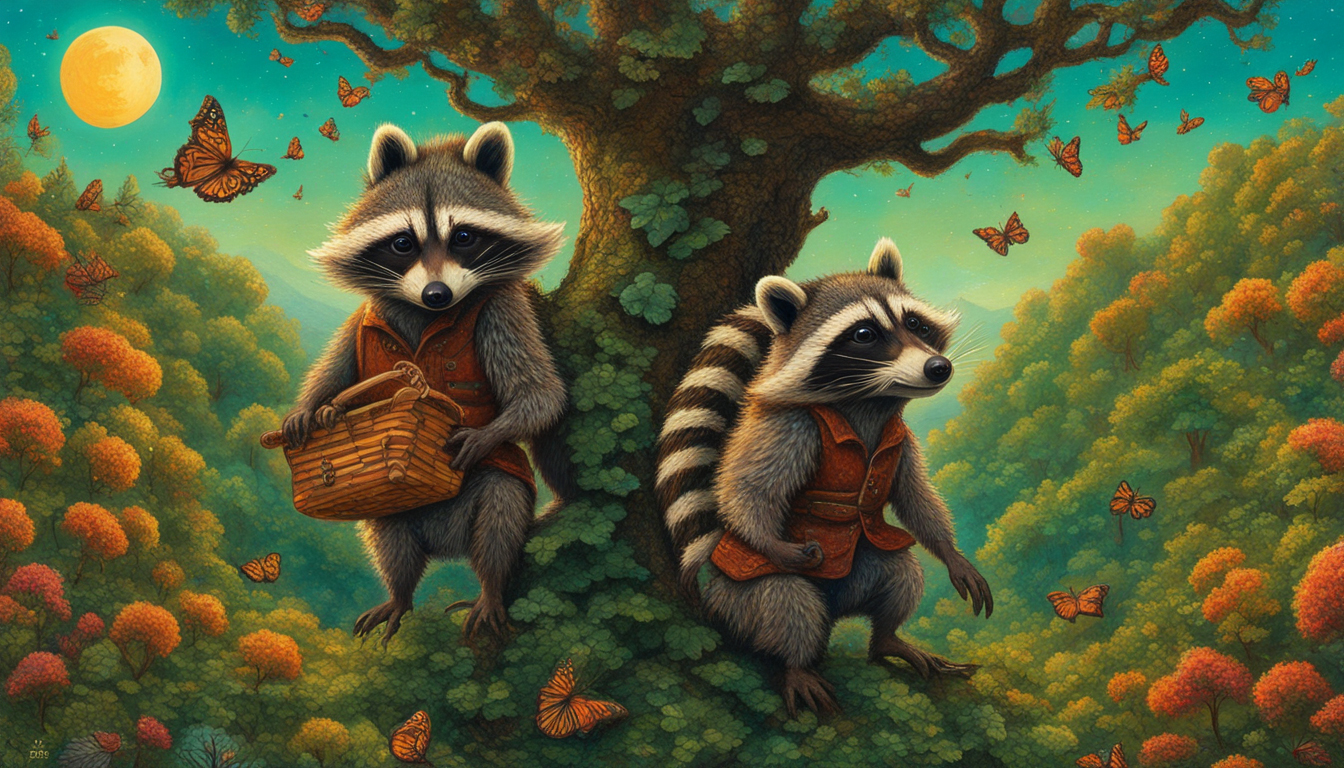

In [45]:
#% html
my $url ='https://i.imgur.com/dtNEeHU.png';
my $img = image-import($url, format => 'asis');
image-from-base64($img, width => 800)

Here we exemplify the use LLaMA "AI vision" capabilities:

In [46]:
#% markdown
llama-text-completion(
    "USER:[img-77]Describe the image.\nASSISTANT:",
    image-data => [{data => $img, id => 77},],
    temperature => 0.5,
    max-tokens => 200,
    format => 'values');

 😊

The image shows a beautiful, serene landscape. There's a tranquil lake in the foreground, surrounded by lush greenery and tall trees that stretch towards the sky. The water's surface is calm, reflecting the vibrant colors of the surrounding environment.

In the background, there are majestic mountains rising high into the air, their peaks still capped with a dusting of snow. The sky above is a brilliant blue, with only a few wispy clouds scattered across it.

The atmosphere of the image exudes peace and serenity, inviting the viewer to step into this idyllic scene and breathe in the fresh mountain air. 🌄<|eot_id|>

**Remark:** Not all LLaMa models "have vision." LLaVA's AI vision seems to be a "hit or miss" -- some explanations are only approximately correct. 

**Remark:** With some of the non-vision models, although, image descriptions are obtained, they have no relations to the given images.

-------

## Command Line Interface

### Playground access

The package provides a Command Line Interface (CLI) script:


In [47]:
#% bash
llama-playground --help

Usage:
  /Users/antonov/.rakubrew/versions/moar-2024.07/share/perl6/site/bin/llama-playground [<words> ...] [--path=<Str>] [--mt|--max-tokens[=Int]] [-m|--model=<Str>] [-r|--role=<Str>] [-t|--temperature[=Real]] [--response-format=<Str>] [-a|--auth-key=<Str>] [--timeout[=UInt]] [-f|--format=<Str>] [--method=<Str>] [--base-url=<Str>] -- Command given as a sequence of words.
  
    --path=<Str>               Path, one of 'completions', 'chat/completions', 'embeddings', 'models', 'tokenize', and 'detokenize'. [default: 'chat/completions']
    --mt|--max-tokens[=Int]    The maximum number of tokens to generate in the completion. [default: 2048]
    -m|--model=<Str>           Model. [default: 'Whatever']
    -r|--role=<Str>            Role. [default: 'user']
    -t|--temperature[=Real]    Temperature. [default: 0.7]
    --response-format=<Str>    The format in which the response is returned. [default: 'url']
    -a|--auth-key=<Str>        Authorization key (to use LLaMA server Web API.) [de


**Remark:** When the authorization key, `auth-key`, is specified to be `Whatever`
then it is assigned the string `sk-no-key-required`.
If an authorization key is required then the env variable `LLAMA_API_KEY` can be also used.

--------

## Mermaid diagram

The following flowchart corresponds to the steps in the package function `llama-playground`:

In [48]:
#% mermaid
graph LR
	UI[/Some natural language text/]
	TO[/"LLaMA<br/>Processed output"/]
	WR[[Web request]]
	LLaMA{{http://127.0.0.1:8080}}
	PJ[Parse JSON]
	Q{Return<br>hash?}
	MSTC[Compose query]
	MURL[[Make URL]]
	TTC[Process]
	QAK{Auth key<br>supplied?}
	EAK[["Try to find<br>LLAMA_API_KEY<br>in %*ENV"]]
	QEAF{Auth key<br>found?}
	NAK[["Use 'sk-no-key-required'"]]
	UI --> QAK
	QAK --> |yes|MSTC
	QAK --> |no|EAK
	EAK --> QEAF
	MSTC --> TTC
	QEAF --> |no|NAK
	QEAF --> |yes|TTC
	TTC -.-> MURL -.-> WR -.-> TTC
	WR -.-> |URL|LLaMA 
	LLaMA -.-> |JSON|WR
	TTC --> Q 
	Q --> |yes|PJ
	Q --> |no|TO
	PJ --> TO

yes no no yes URL JSON yes no Some natural language text LLaMA Processed output Web request http://127.0.0.1:8080 Parse JSON Return hash? Compose query Make URL Process Auth key supplied? Try to find LLAMA_API_KEY in %*ENV Auth key found? Use 'sk-no-key-required'


--------

## References

### Packages

[AAp1] Anton Antonov,
[WWW::OpenAI Raku package](https://github.com/antononcube/Raku-WWW-OpenAI),
(2023-2024),
[GitHub/antononcube](https://github.com/antononcube).

[AAp2] Anton Antonov,
[WWW::MistralAI Raku package](https://github.com/antononcube/Raku-WWW-MistralAI),
(2023-2024),
[GitHub/antononcube](https://github.com/antononcube).

[AAp3] Anton Antonov,
[LLM::Functions Raku package](https://github.com/antononcube/Raku-LLM-Functions),
(2023-2024),
[GitHub/antononcube](https://github.com/antononcube).

[AAp4] Anton Antonov,
[LLM::Prompts Raku package](https://github.com/antononcube/Raku-LLM-Prompts),
(2023-2024),
[GitHub/antononcube](https://github.com/antononcube).

[AAp5] Anton Antonov,
[Jupyter::Chatbook Raku package](https://github.com/antononcube/Raku-Jupyter-Chatbook),
(2023),
[GitHub/antononcube](https://github.com/antononcube).

[AAp6] Anton Antonov,
[ML::FindTextualAnswer Raku package](https://github.com/antononcube/Raku-ML-FindTextualAnswer),
(2023-2024),
[GitHub/antononcube](https://github.com/antononcube).

[MO1] Mozilla Ocho, [llamafile](https://github.com/mozilla-Ocho/llamafile).

[MO2] Mozilla Ocho, [llamafile documentation](https://github.com/Mozilla-Ocho/llamafile/blob/main/README.md).